In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# data with x and y coordinates
# x = Number of Years of Experience within a field
# y = Salary in $1000

data =[
    [1.2, 39.344],
    [1.4, 46.206],
    [1.6, 37.732],
    [2.1, 43.526],
    [2.3, 39.892],
    [3.0, 56.643],
    [3.1, 60.151],
    [3.3, 54.446],
    [3.3, 64.446],
    [3.8, 57.190],
    [4.0, 63.219],
    [4.1, 55.795],
    [4.1, 56.958],
    [4.2, 57.082],
    [4.6, 61.112],
    [5.0, 67.939],
    [5.2, 66.030],
    [5.4, 83.089],
    [6.0, 81.364],
    [6.1, 93.941],
    [6.9, 91.739],
    [7.2, 98.274],
    [8.0, 101.30],
    [8.3, 113.81],
    [8.8, 109.43],
    [9.1, 105.58],
    [9.6, 116.97],
    [9.7, 112.63],
    [10.4, 121.2],
    [10.6, 121.8]
]

In [4]:
# Create a pandas data frame to make it easier to work with

df = pd.DataFrame(data, columns=['YearsExperience', 'Salary'])
df

,YearsExperience,Salary
0,1.2,39.344
1,1.4,46.206
2,1.6,37.732
3,2.1,43.526
4,2.3,39.892
5,3.0,56.643
6,3.1,60.151
7,3.3,54.446
8,3.3,64.446
9,3.8,57.190


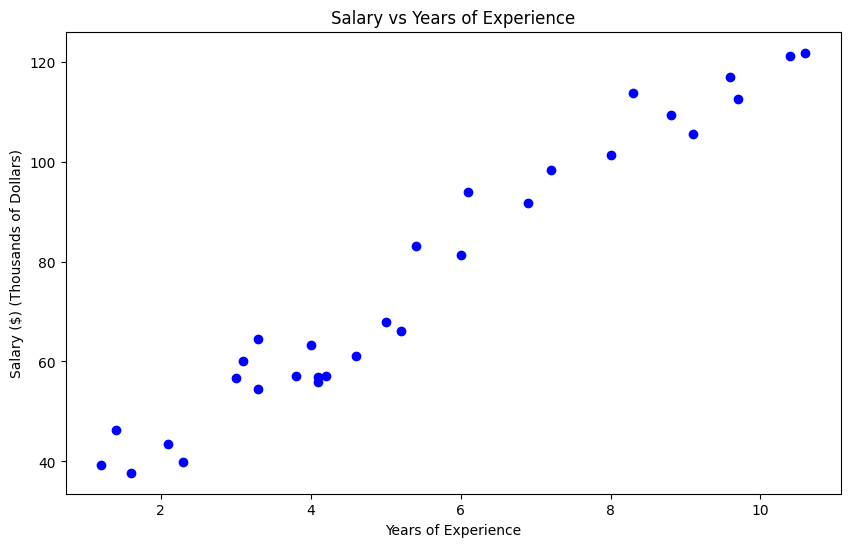

In [5]:
# Visualize the data confirming that there is some linear relationship

plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Data Points')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($) (Thousands of Dollars)')
plt.show()

In [6]:
'''
Function to calculate the mean squared error between the model's best fit line (y = mx + b) and the points
~ E = 1/n * ∑(yi - (m(xi)+b))^2

- The error for a particular (x, y) cooordinate point and the model's best fit line (y = mx + b) is the difference between them
- Sum all the squares of the errors and divide by the number of points in the data to get the total Error


'''

def MeanSquaredError(m, b, data):
    totalError = 0
    n = len(data)

    for x, y in data.itertuples(index = False):
        totalError += (y - (m * x + b)) ** 2

    return totalError / float(n)

In [7]:
'''
Function to perform the Gradient Descent Algorithm on our model's variables (m and b) to create an accurate best fit line

Calculate Derivatives with respect to the Error
~ ∂E/∂m = 2/n * ∑xi * (yi - (m(xi)+b))
~ ∂E/∂b = -2/n * ∑yi - (m(xi)+b)

- These calculated Derivatives will give the maximum change in Error per change in variable (steepest ascent)
- We subtract the negative of the derivative to get the steepest descent towards the minimum

Calculate new m and b
m = m_curr - ∂E/∂m * learningRate
w = w_curr - ∂E/∂w * learningRate
'''

def GradientDescent(m_curr, b_curr, data, lr):
    mGradient = 0
    bGradient = 0
    n = len(data)  # Get the number of points

    for x, y in data.itertuples(index = False):
        mGradient += -(2/n) * x * (y - (m_curr * x + b_curr))
        bGradient += -(2/n) * (y - (m_curr * x + b_curr))

    m = m_curr - mGradient * lr
    b = b_curr - bGradient * lr
    return m, b

epoch: 0
6492.711835066667


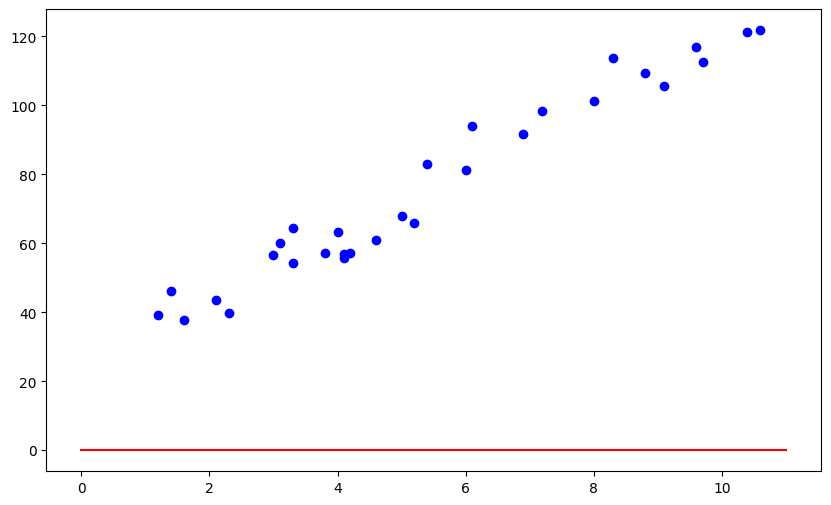

epoch: 10
1455.5414097855053


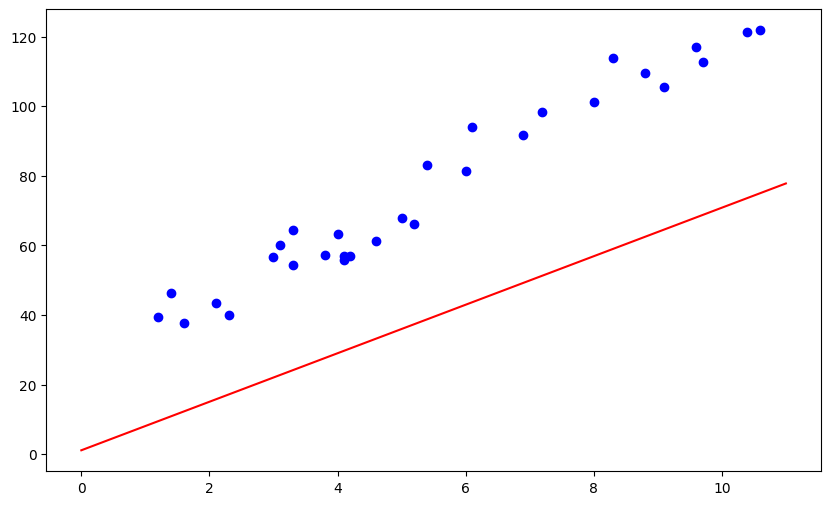

epoch: 20
412.96198958779695


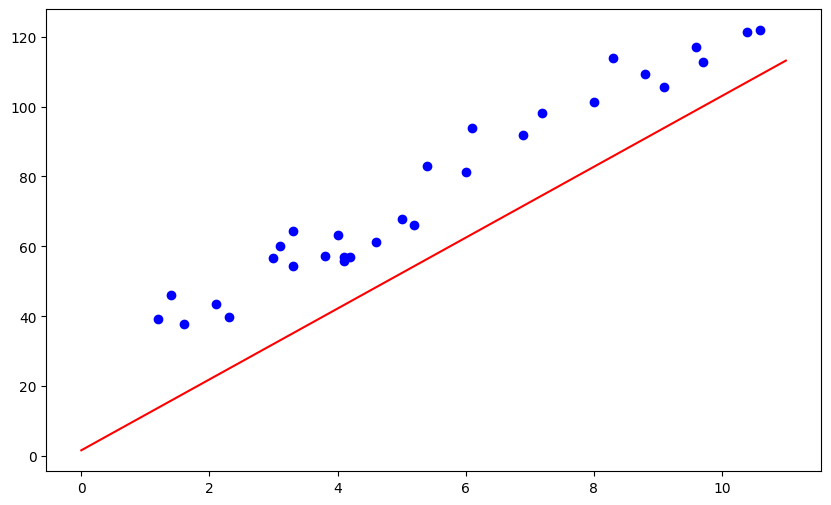

epoch: 30
196.60804417735983


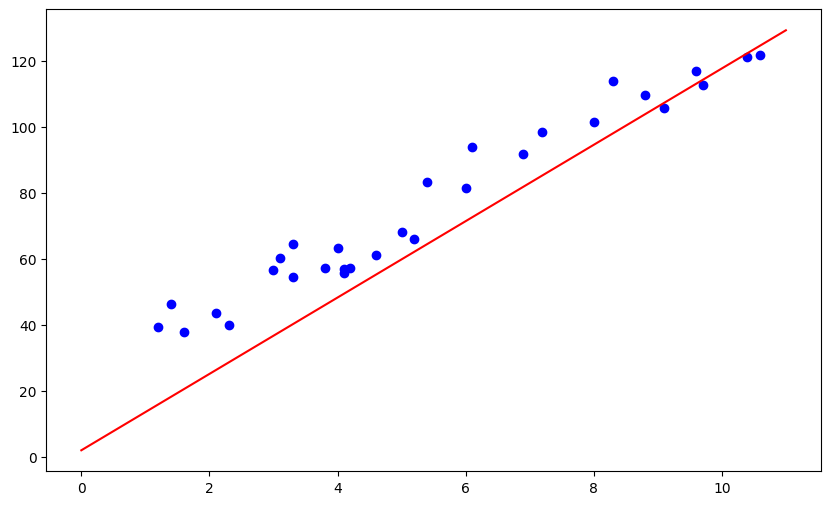

epoch: 40
151.15193976370477


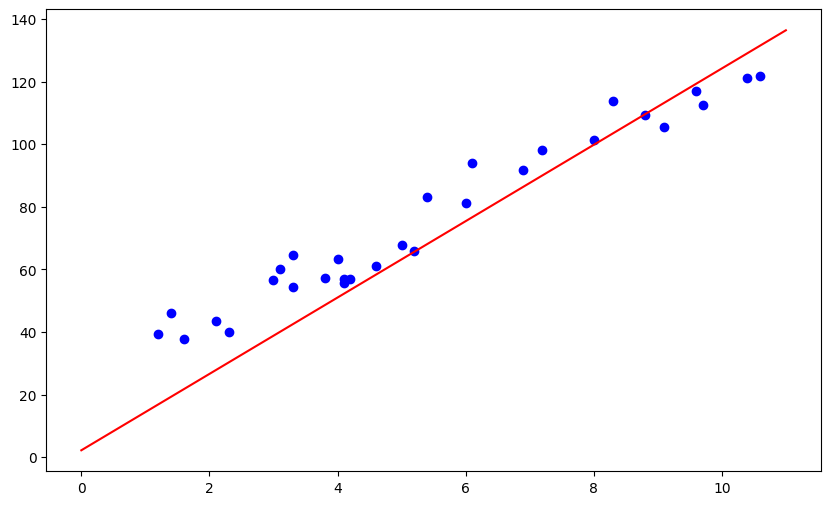

epoch: 50
141.04920608868613


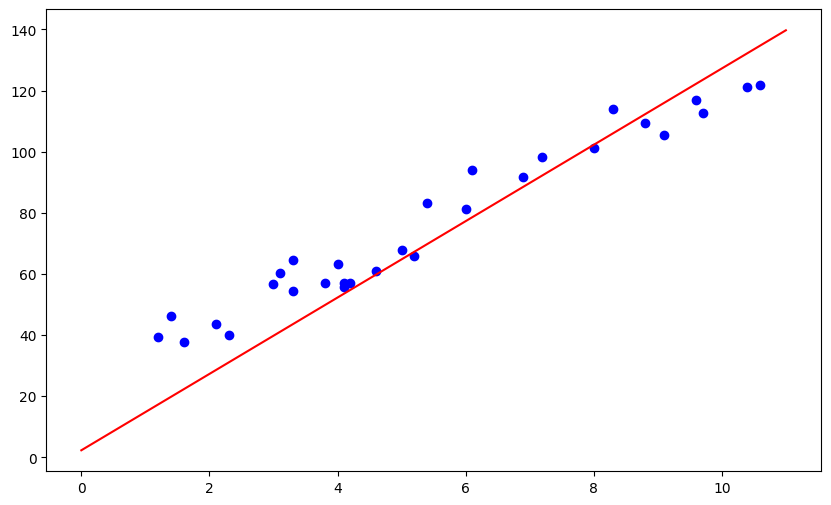

epoch: 60
138.26451083643053


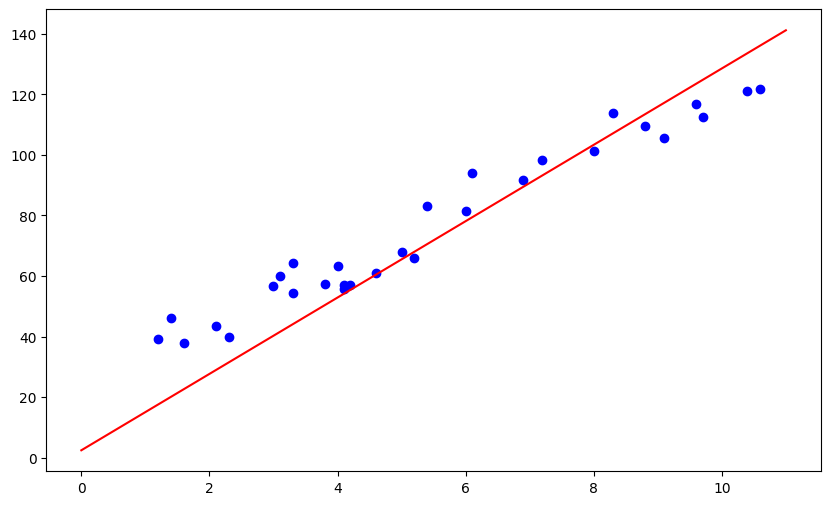

epoch: 70
136.99913055334835


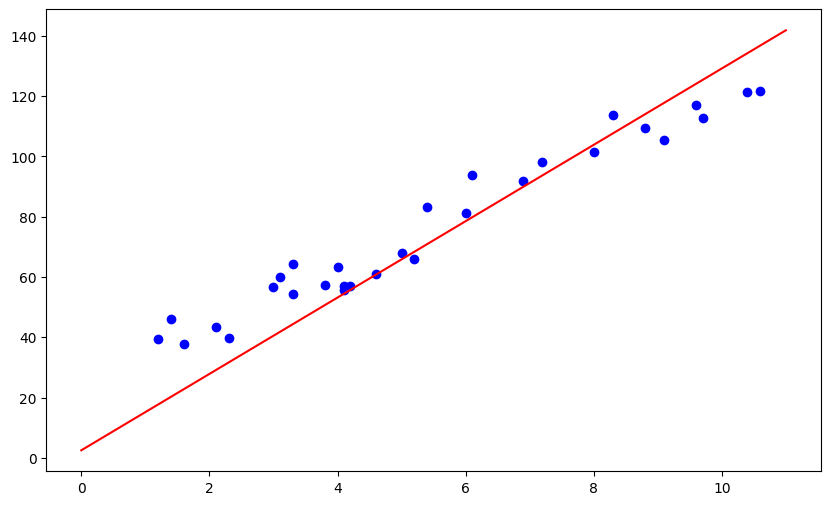

epoch: 80
136.0536420490125


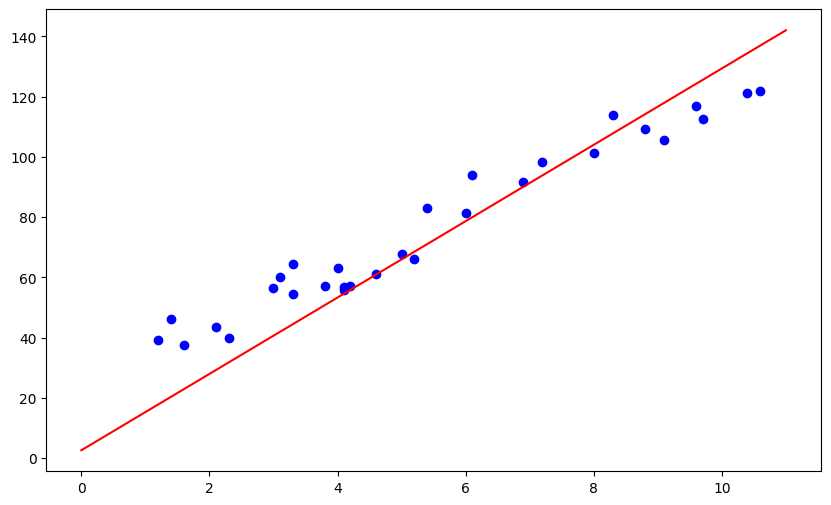

epoch: 90
135.17991689908447


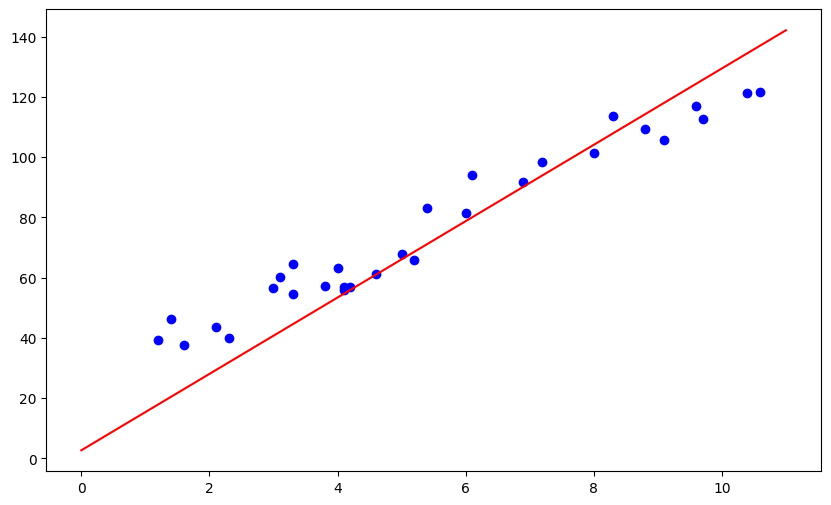

m: 12.667821419780019, b: 2.8085227250165765
134.3265877206529


In [8]:
# Set Initial Values
m = 0
b = 0
learningRate = 0.001 #also try out 0.01 and 0.1
epochs = 100

for i in range(epochs):
    if i%10 == 0:
        print(f"epoch: {i}")
        print(MeanSquaredError(m, b, df))
        plt.figure(figsize=(10, 6))
        plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Data Points')
        plt.plot(list(range(0,12)), [m * x + b for x in range(0,12)], color ="red")
        plt.show()

    m, b = GradientDescent(m, b, df, learningRate)

print(f"m: {m}, b: {b}")
print(MeanSquaredError(m, b, df))

In [9]:
# Predictions of the model

years_of_experience = 2.8

salary = m * years_of_experience + b

print(f"with {years_of_experience} years of experience you will get ${round((salary * 1000), 2)} salary")

with 2.8 years of experience you will get $38278.42 salary


In [10]:
# fetch sklearn dataset for california housing prices

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data



{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [11]:
# Make a pandas dataframe in order to work with and visualize the data easier

df = pd.DataFrame(data.data, columns = data.feature_names)
df['MedHouseVal'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [12]:
'''
Make a train / test split
~ 80% of data is used to train the model
~ 20% of data is used to test the model

X = Features of the dataset
y = Target of the dataset (House Price Value)
'''
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.5558915986952444


In [16]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [20]:
import numpy as np

MedInc = 3.5
HouseAge = 25
AveRooms = 	5.3
AveBedrms = 1.2
Population = 800
AveOccup = 2.5
Latitude = 34.5
Longitude = -118.5

house_1 = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])

house_1_value = model.predict(house_1)
house_1_value[0] * 100000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


197747.65051290332

In [22]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

In [23]:
loaded_model = joblib.load('model.pkl')

house_1_value = loaded_model.predict(house_1)

house_1_value[0] * 100000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


197747.65051290332